# Academic Writing Project
### Text scraping and linguistic analysis

#### Importing request module
At first, it is important to import the requests module, which allows us to send HTTP requests with Python.

In [7]:
import requests

#### Getting a page data
requests.get() method sends a request to the chosen url. We can assign the content to a variable and print it.

In [ ]:
page = requests.get("https://www.football365.com/news/man-city-ffp-relegation-not-sensationalised-premier-league-desire/")
print(page)
print(page.content)

#### BeautifulSoup package
Here, it is worth mentioning the Wikipedia, which describes the application of the package: 
"Beautiful Soup is a Python package for parsing HTML and XML documents, including those with malformed markup. It creates a parse tree for documents that can be used to extract data from HTML, which is useful for web scraping."

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
soup

#### Finding paragraphs in a chosen text
To distinguish paragraphs in the text, we need to use "find_all" method as below. We will assign this to the "paras" variable:

In [11]:
paras = soup.find_all('p')
print (paras)

[<p>Man City have been told that rumoured penalties of “expulsion or relegation” are not “sensationalised at all” if they are found guilty of their charges for alleged breaches of the Premier League’s financial fair play rules.</p>, <p>Speaking at the end of April, Premier League chief executive Richard Masters said that <a href="https://www.football365.com/news/man-city-ffp-pep-guardiola-leak-charges-linked-expulsion-realistic"><strong>the league’s case against Man City over alleged breaches of its financial rules</strong></a> “will resolve itself in the near future”.</p>, <p>The Citizens won the Premier League title in May after beating West Ham 3-1 <strong><a href="https://www.football365.com/news/opinion-16-final-day-conclusions-foden-arsenal-klopp">on the final day of the season</a></strong>, which is their second since 115 charges were laid against them by the Premier League in February last year.</p>, <p>Asked whether a second <a href="https://www.football365.com/manchester-city

#### Separating the text itself
The next step will be very important, as we would like to pull only the text from a chosen website. To do it, we use the for loop along with getText and strip method. The latter removes starting and ending whitespaces from a given string.

In [12]:
only_text = []
for el in paras:
  if len(el.getText().strip()) > 0:
    only_text.append(el.getText())
print(only_text)

['Man City have been told that rumoured penalties of “expulsion or relegation” are not “sensationalised at all” if they are found guilty of their charges for alleged breaches of the Premier League’s financial fair play rules.', 'Speaking at the end of April, Premier League\xa0chief executive Richard Masters said that the league’s case against Man City over alleged breaches of its financial rules “will resolve itself in the near future”.', 'The Citizens won the Premier League title in May after beating West Ham 3-1 on the final day of the season, which is their second since 115 charges were laid against them by the Premier League in February last year.', 'Asked whether a second Man City success while the charges remained outstanding would damage European league football, Masters said: “It’s not for the football authorities to start being selective about who they would like to win the league.', '“The key point is that you’ve got that jeopardy until the final day. Who knows where we will 

### Lingustics tools and analysis
Having the text, we can implement several lingustics tools to analyse it in lingustics terms. Our first step in this matter needs to be a nltk (Natural Language Toolkit) package import. Later, we need to download nltk data, using the download method and chosing the data that we are interested in. Below we download the popular ones (nltk.download("popular")). We can, however, download all of them as well.

In [15]:
import nltk

In [ ]:
import nltk
nltk.download("popular")

In [ ]:
nltk.download("all")

In [13]:
for sentence in only_text:
  print(sentence)

Man City have been told that rumoured penalties of “expulsion or relegation” are not “sensationalised at all” if they are found guilty of their charges for alleged breaches of the Premier League’s financial fair play rules.
Speaking at the end of April, Premier League chief executive Richard Masters said that the league’s case against Man City over alleged breaches of its financial rules “will resolve itself in the near future”.
The Citizens won the Premier League title in May after beating West Ham 3-1 on the final day of the season, which is their second since 115 charges were laid against them by the Premier League in February last year.
Asked whether a second Man City success while the charges remained outstanding would damage European league football, Masters said: “It’s not for the football authorities to start being selective about who they would like to win the league.
“The key point is that you’ve got that jeopardy until the final day. Who knows where we will be on May 19?”
Ma

#### Sentence tokenization
To tokenize our sentences from a scraped text, we need to use the "word_tokenize" method, as below:

In [16]:
for sentence in only_text:
  print(nltk.word_tokenize(sentence))

['Man', 'City', 'have', 'been', 'told', 'that', 'rumoured', 'penalties', 'of', '“', 'expulsion', 'or', 'relegation', '”', 'are', 'not', '“', 'sensationalised', 'at', 'all', '”', 'if', 'they', 'are', 'found', 'guilty', 'of', 'their', 'charges', 'for', 'alleged', 'breaches', 'of', 'the', 'Premier', 'League', '’', 's', 'financial', 'fair', 'play', 'rules', '.']
['Speaking', 'at', 'the', 'end', 'of', 'April', ',', 'Premier', 'League', 'chief', 'executive', 'Richard', 'Masters', 'said', 'that', 'the', 'league', '’', 's', 'case', 'against', 'Man', 'City', 'over', 'alleged', 'breaches', 'of', 'its', 'financial', 'rules', '“', 'will', 'resolve', 'itself', 'in', 'the', 'near', 'future', '”', '.']
['The', 'Citizens', 'won', 'the', 'Premier', 'League', 'title', 'in', 'May', 'after', 'beating', 'West', 'Ham', '3-1', 'on', 'the', 'final', 'day', 'of', 'the', 'season', ',', 'which', 'is', 'their', 'second', 'since', '115', 'charges', 'were', 'laid', 'against', 'them', 'by', 'the', 'Premier', 'League

#### Words tagging in a sentence
Another useful tool is "pos_tag" method that helps us getting parts of speech tags for our sentence. Here, I implement it with a help of a for loop and present it using tuples.

In [17]:
tuples = []
for sentence in only_text:
  tokens = (nltk.word_tokenize(sentence))
  pos_tagged = nltk.pos_tag(tokens)
  for item in pos_tagged:
    tuples.append(item)
print(tuples)

[('Man', 'NNP'), ('City', 'NNP'), ('have', 'VBP'), ('been', 'VBN'), ('told', 'VBN'), ('that', 'IN'), ('rumoured', 'JJ'), ('penalties', 'NNS'), ('of', 'IN'), ('“', 'JJ'), ('expulsion', 'NN'), ('or', 'CC'), ('relegation', 'NN'), ('”', 'NNS'), ('are', 'VBP'), ('not', 'RB'), ('“', 'RB'), ('sensationalised', 'VBN'), ('at', 'IN'), ('all', 'DT'), ('”', 'VBP'), ('if', 'IN'), ('they', 'PRP'), ('are', 'VBP'), ('found', 'VBN'), ('guilty', 'JJ'), ('of', 'IN'), ('their', 'PRP$'), ('charges', 'NNS'), ('for', 'IN'), ('alleged', 'JJ'), ('breaches', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Premier', 'NNP'), ('League', 'NNP'), ('’', 'NNP'), ('s', 'VBP'), ('financial', 'JJ'), ('fair', 'JJ'), ('play', 'NN'), ('rules', 'NNS'), ('.', '.'), ('Speaking', 'VBG'), ('at', 'IN'), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('April', 'NNP'), (',', ','), ('Premier', 'NNP'), ('League', 'NNP'), ('chief', 'JJ'), ('executive', 'NN'), ('Richard', 'NNP'), ('Masters', 'NNP'), ('said', 'VBD'), ('that', 'IN'), ('the', 'DT'), 

#### Parts of speech frequency (dictionary)
WHich of the parts of speech is the most frequent one? We can check it and present it creating a dictionary and adding values using a for loop.

In [18]:
counter_dict = {}

for el in tuples:
    tag = el[1]
    if tag not in counter_dict:
      counter_dict[tag] = 1
    else:
      counter_dict[tag] += 1

print(counter_dict)

{'NNP': 106, 'VBP': 25, 'VBN': 16, 'IN': 84, 'JJ': 45, 'NNS': 18, 'NN': 93, 'CC': 14, 'RB': 18, 'DT': 56, 'PRP': 28, 'PRP$': 4, '.': 16, 'VBG': 6, ',': 18, 'VBD': 17, 'MD': 13, 'VB': 27, 'CD': 9, 'WDT': 1, 'VBZ': 13, ':': 6, 'TO': 6, 'WP': 5, 'WRB': 3, 'EX': 1, 'RBR': 1, 'FW': 2, 'JJR': 1}


#### Separating keys and values of the dictionary
We can also check and display the keys and values  (separately) of formely created dictionary:

In [19]:
keys = []
values = []

for el in counter_dict:
  keys.append(el)
  values.append(counter_dict[el])

print(keys)
print(values)

['NNP', 'VBP', 'VBN', 'IN', 'JJ', 'NNS', 'NN', 'CC', 'RB', 'DT', 'PRP', 'PRP$', '.', 'VBG', ',', 'VBD', 'MD', 'VB', 'CD', 'WDT', 'VBZ', ':', 'TO', 'WP', 'WRB', 'EX', 'RBR', 'FW', 'JJR']
[106, 25, 16, 84, 45, 18, 93, 14, 18, 56, 28, 4, 16, 6, 18, 17, 13, 27, 9, 1, 13, 6, 6, 5, 3, 1, 1, 2, 1]


#### Stemming
What is stemming?
towardsdatascience.com says: "This is when ‘fluff’ letters (not words) are removed from a word and grouped together with its “stem form”. For instance, the words ‘play’, ‘playing’, or ‘plays’ convey the same meaning (although, again, not exactly, but for analysis with a computer, that sort of detail is still not a viable option). So instead of having them as different words, we can put them together under the same umbrella term ‘play’."

To stem our text, we need to do the following thing:

In [20]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = only_text
stemmed = [stemmer.stem(word) for word in words]
print(stemmed)

['man city have been told that rumoured penalties of “expulsion or relegation” are not “sensationalised at all” if they are found guilty of their charges for alleged breaches of the premier league’s financial fair play rules.', 'speaking at the end of april, premier league\xa0chief executive richard masters said that the league’s case against man city over alleged breaches of its financial rules “will resolve itself in the near future”.', 'the citizens won the premier league title in may after beating west ham 3-1 on the final day of the season, which is their second since 115 charges were laid against them by the premier league in february last year.', 'asked whether a second man city success while the charges remained outstanding would damage european league football, masters said: “it’s not for the football authorities to start being selective about who they would like to win the league.', '“the key point is that you’ve got that jeopardy until the final day. who knows where we will 

#### Removing "Stop words"
We can also remove so called "Stop words". What are they? According to Kavita Ganesan, "a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead."

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
to_be_removed = set(stopwords.words('english'))

tokenized_para=word_tokenize(str(only_text))
print(tokenized_para)
modified_token_list=[word for word in tokenized_para if not word in to_be_removed]
print(modified_token_list)

['[', "'Man", 'City', 'have', 'been', 'told', 'that', 'rumoured', 'penalties', 'of', '“', 'expulsion', 'or', 'relegation', '”', 'are', 'not', '“', 'sensationalised', 'at', 'all', '”', 'if', 'they', 'are', 'found', 'guilty', 'of', 'their', 'charges', 'for', 'alleged', 'breaches', 'of', 'the', 'Premier', 'League', '’', 's', 'financial', 'fair', 'play', 'rules', '.', "'", ',', "'Speaking", 'at', 'the', 'end', 'of', 'April', ',', 'Premier', 'League\\xa0chief', 'executive', 'Richard', 'Masters', 'said', 'that', 'the', 'league', '’', 's', 'case', 'against', 'Man', 'City', 'over', 'alleged', 'breaches', 'of', 'its', 'financial', 'rules', '“', 'will', 'resolve', 'itself', 'in', 'the', 'near', 'future', '”', '.', "'", ',', "'The", 'Citizens', 'won', 'the', 'Premier', 'League', 'title', 'in', 'May', 'after', 'beating', 'West', 'Ham', '3-1', 'on', 'the', 'final', 'day', 'of', 'the', 'season', ',', 'which', 'is', 'their', 'second', 'since', '115', 'charges', 'were', 'laid', 'against', 'them', 'by'

#### Data presented by a chart
Our data can be accesibly presented using different types of charts, for example. To do so, we need to import matplotlib.pyplot collection.

In [22]:
import matplotlib.pyplot as plt

#### Presenting data with charts
After getting the collection, we can choose bar chart or pie chart, for instance:

<BarContainer object of 29 artists>

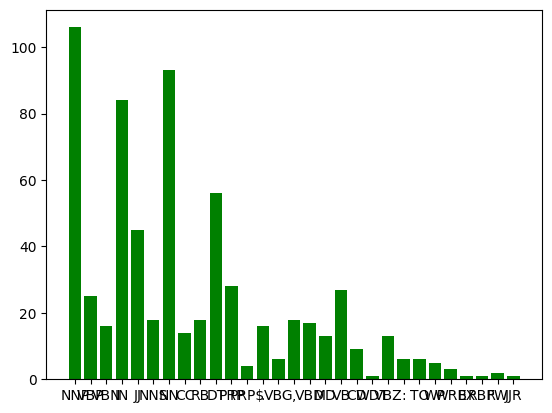

In [33]:
plt.bar(keys, values, color="green")

([<matplotlib.patches.Wedge at 0x21a1bcc2ba0>,
 [Text(0.9596160842017858, 0.5377145812986955, 'NNP'),
  Text(0.457394741595583, 1.0003949471887141, 'VBP'),
  Text(0.252149060968295, 1.0707104422077929, 'VBN'),
  Text(-0.2727374156460569, 1.06565205489724, 'IN'),
  Text(-0.8422702129587474, 0.7075174120560048, 'JJ'),
  Text(-1.0152503738673118, 0.42339895885828993, 'NNS'),
  Text(-1.0892784768661128, -0.1532070489117307, 'NN'),
  Text(-0.8721506167624975, -0.6703381994790356, 'CC'),
  Text(-0.7588543802909162, -0.7963290962367817, 'RB'),
  Text(-0.4331628563080419, -1.0111231081896304, 'DT'),
  Text(2.5747357732524542e-08, -1.0999999999999999, 'PRP'),
  Text(0.16893623451424647, -1.0869501132380215, 'PRP$'),
  Text(0.2727374218819031, -1.06565205330127, '.'),
  Text(0.3839591215286124, -1.0308129767300063, 'VBG'),
  Text(0.5003338483102141, -0.9796254591603323, ','),
  Text(0.6576615152568628, -0.8817490183436824, 'VBD'),
  Text(0.7778174775113333, -0.7778174410990709, 'MD'),
  Text(0.9

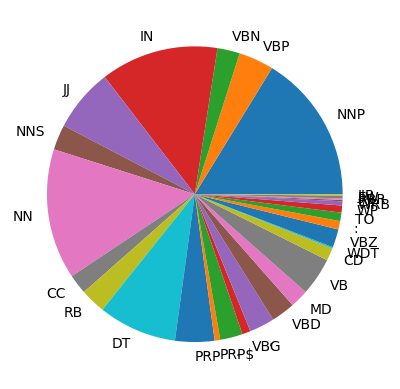

In [35]:
plt.pie(values,labels = keys)